### Periodic Reprots

1. Reports generated in copertes on repetedly weekly or bi weekly.
2. You have to inform more than 200 project owners for there existing task.
3. Analytical reports or paper based dashboards


In [1]:
# Import of necessay libraries , 
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import docx
from docx.shared import Inches

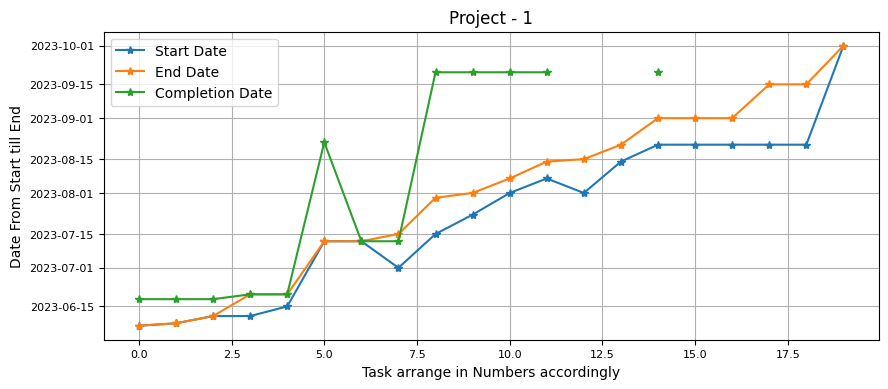

In [3]:
# Reading the file 
temp = pd.read_excel('Data/PaperReportsData.xlsx')


# Some required data
to_days = dt.date.today()
to_days = pd.to_datetime(to_days)


i = 'Project - 1'
doc = docx.Document()
section = doc.sections[0]
header = section.header
paragraph = header.paragraphs[0]
paragraph.text = "Your Logo\t Projects Progress Tracking "
paragraph.style = doc.styles["Header"]

# temp = df.copy()
temp = temp[temp['Project Name'] == i]

# Code for Privious overall project
doc.add_heading('\t\t Overall Project status from Start to End', level=2)
doc.add_heading("Report Date "+str(to_days.date())+"\t\t\t\t\t\t Project Type :"+ str(temp['Type'].unique()[0]), level=9)

# Used simple oneliner matplotlip to save pic at specific location
temp[['Start Date', 'End Date' , 'Completion Date']].plot(style='*-', figsize=(10, 4), fontsize=8, title=i, grid=True, xlabel='Task arrange in Numbers accordingly', ylabel='Date From Start till End')
plt.savefig('Data/Matplotlib/'+i+'.png')

# Now use the same picture to make our report advance analitics
doc.add_picture('Data/Matplotlib/'+i+'.png', width=Inches(6.25))

# We can use text, We have the power of python to use whatever conditions are required.
doc.add_paragraph('Project Detail View from start untill today can be observed. Star Marked are Tasks According to there Planned, Start and End Date and Actual Completion.                    Variance between the Planned Closed date and Actual Closed Date are clearly visible. ')

#  Delayed Items
o1 = temp[['Project Task Name', 'End Date','Completion Date']]
o1 = o1.copy()
o1['Extra Days'] =  o1['Completion Date'] - o1['End Date']
o1 = o1[(o1['Extra Days'].notna())]
o1 = o1[(o1['Extra Days'] >= pd.to_timedelta(1,unit='D'))]

if o1.shape[0] != 0:
    doc.add_heading('Progress Delayed Items ', level=2)
    doc.add_heading('Following items effected the progress performence ', level=5)    
    t3 = doc.add_table(o1.shape[0]+1, o1.shape[1], style = 'Table Grid')

    # add the header rows.
    for j3 in range(o1.shape[-1]):
        t3.cell(0,j3).text = o1.columns[j3]

    # add the rest of the data frame
    for m3 in range(o1.shape[0]):
        for j3 in range(o1.shape[-1]):
            t3.cell(m3+1,j3).text = str(o1.values[m3,j3])

doc.save('ProjectWiseProgressTracker '+ str(to_days.date())+ '.docx')

# You can also write some lines to convert this reprot to PDF.
